# **Task-4: Loan Approval Prediction**



#  Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

#  Step 2: Load the Dataset

In [2]:
df = pd.read_csv('Loan-Approval-Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#  Step 3: Check for Missing Values and Data Info

In [3]:
print(df.info())         # Summary of dataset
print(df.isnull().sum()) # Count missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education  

#  Step 4: Handle Missing Values

In [4]:
# Separate columns by data type
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns

# Fill missing categorical values with most frequent
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# Fill missing numerical values with mean
imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

 # Feature Correlation Heatmap

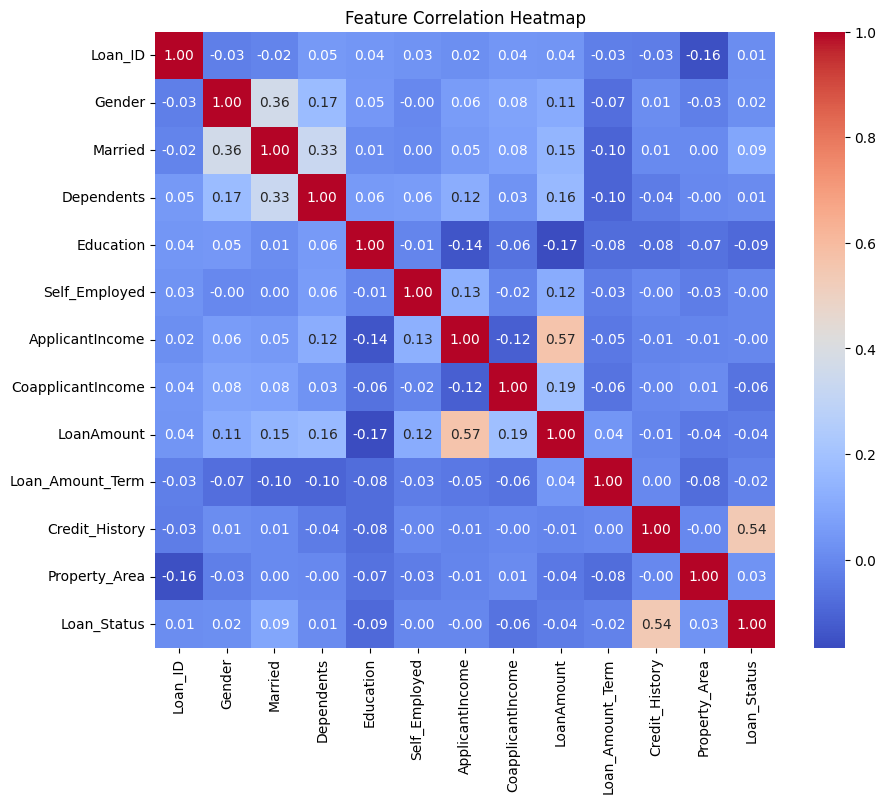

In [16]:
# 📊 Heatmap: Feature Correlation (after encoding)
plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


#  Step 5: Encode Categorical Features

In [5]:
# Convert text to numeric using LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

#  Step 6: Define Features (X) and Target (y)

In [6]:
X = df.drop('Loan_Status', axis=1)  # Input features
y = df['Loan_Status']              # Target variable

 # Class Distribution Before SMOTE

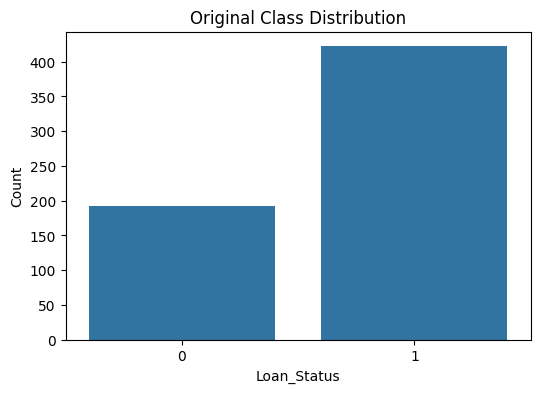

In [14]:
# 📊 Visualize class distribution before SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Original Class Distribution')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()


# Step 7: Balance the Dataset Using SMOTE

In [7]:
# To deal with class imbalance
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

 # Class Distribution After SMOTE

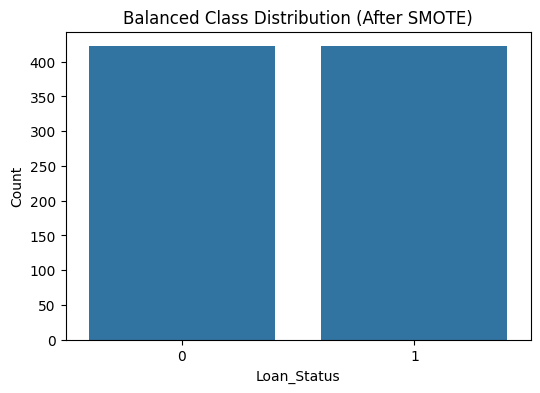

In [15]:
# 📊 Visualize class distribution after SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled)
plt.title('Balanced Class Distribution (After SMOTE)')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()


#  Step 8: Split the Dataset into Train and Test Sets

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


#  Step 9: Train Logistic Regression Model

In [9]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

#  Step 10: Train Decision Tree Classifier

In [10]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

#  Step 11: Evaluate Logistic Regression

In [11]:
print("📊 Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

📊 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.70      0.60      0.64        94
           1       0.57      0.68      0.62        75

    accuracy                           0.63       169
   macro avg       0.64      0.64      0.63       169
weighted avg       0.64      0.63      0.63       169

Confusion Matrix:
[[56 38]
 [24 51]]


#  Step 12: Evaluate Decision Tree

In [12]:
print("📊 Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

📊 Decision Tree Results:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        94
           1       0.71      0.76      0.74        75

    accuracy                           0.76       169
   macro avg       0.76      0.76      0.76       169
weighted avg       0.76      0.76      0.76       169

Confusion Matrix:
[[71 23]
 [18 57]]


 # Confusion Matrix Heatmaps for Both Models

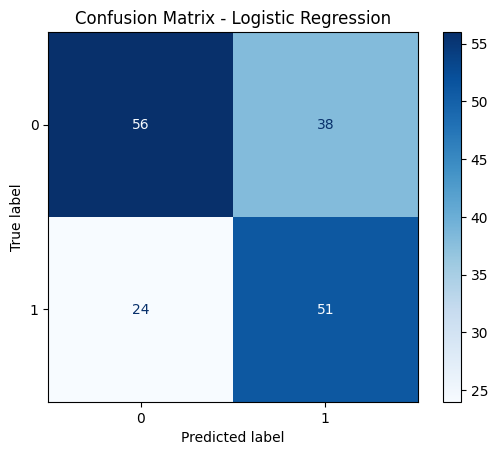

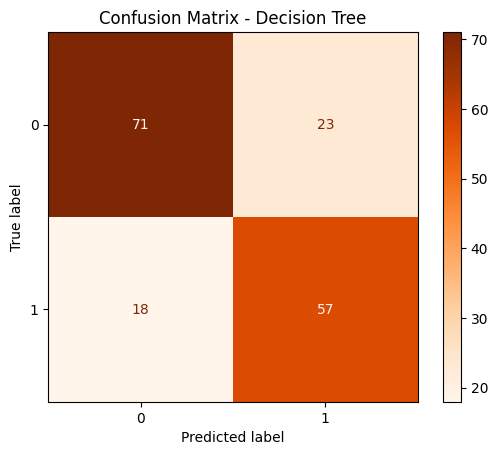

In [17]:
# 📊 Confusion Matrix - Logistic Regression (Heatmap)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# 📊 Confusion Matrix - Decision Tree (Heatmap)
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap='Oranges')
plt.title('Confusion Matrix - Decision Tree')
plt.show()
